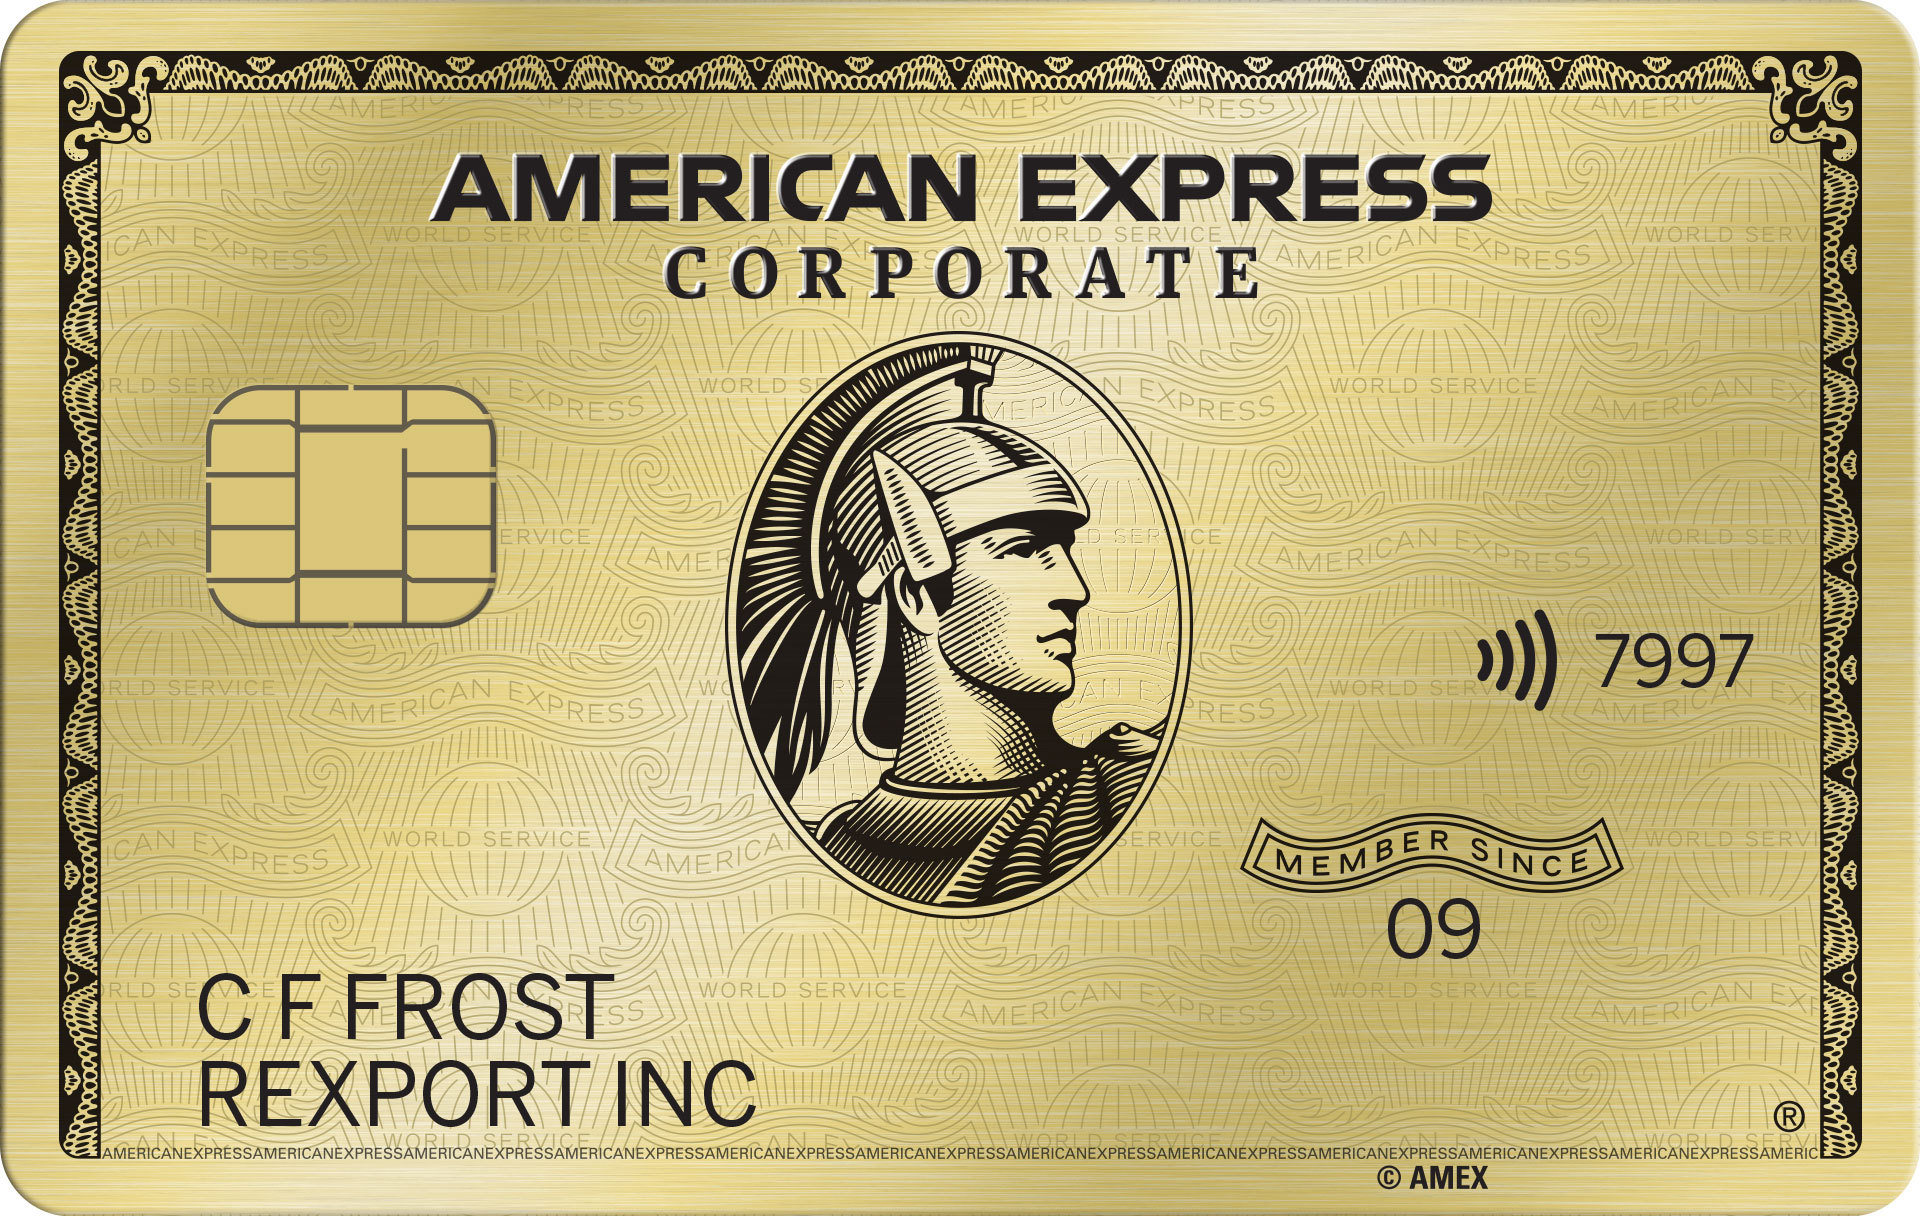

# Predicting Future Credit Deliquencies with AmEx

<b>Authors:</b> Arbonies, Mark; Friedman, Nick; Newcomb, Wes

## Overview

### Business Understanding

### Data Files

- <b>train_data.csv</b> - training data with multiple statement dates per customer_ID
- <b>train_labels.csv</b> - target label for each customer_ID
- <b>test_data.csv</b> - corresponding test data; your objective is to predict the target label for each customer_ID

### Data Description

The objective of this experiment is to predict the probability that a customer does not pay back their credit card balance amount in the future based on their monthly customer profile. The target binary variable is calculated by observing 18 months performance window after the latest credit card statement, and if the customer does not pay due amount in 120 days after their latest statement date it is considered a default event.

The dataset contains aggregated profile features for each customer at each statement date. Features are anonymized and normalized, and fall into the following general categories:

- <b>D_*</b> - Delinquency variables
- <b>S_*</b> - Spend variables
- <b>P_*</b> - Payment variables
- <b>B_*</b> - Balance variables
- <b>R_*</b> - Risk variables

with the following features being categorical:

```['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']```

and the following features being defined:

- <b>customer_ID</b> - unique customer identifier
- <b>S_2</b> - date, though unsure of what the date indicates (at the moment)

### Problem Statement

Our task is to predict, for each customer_ID, the probability of a future payment default (target = 1).

Note that the negative class has been subsampled for this dataset at 5%, and thus receives a 20x weighting in the scoring metric.***

### Strategy / Methodology

## Exploratory Data Analysis and Visualization (Validation??)

### Loading Data and Tools into Notebook Memory

In [18]:
# import requisite libraries
import pandas as pd
import numpy as np

# setting options 
pd.options.display.max_columns = None

In [3]:
# load data into memory
df = pd.read_csv("data/train_sample_data.csv", index_col=0)
target = pd.read_csv("data/train_sample_labels.csv", index_col=0)

### Data

In [19]:
# preview dataset
df.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,NaN,NaN,0.000630,0.080986,0.708906,0.170600,0.006204,0.358587,0.525351,0.255736,NaN,0.063902,0.059416,0.006466,0.148698,1.335856,0.008207,0.001423,0.207334,0.736463,0.096219,NaN,0.023381,0.002768,0.008322,1.001519,0.008298,0.161345,0.148266,0.922998,0.354596,0.152025,0.118075,0.001882,0.158612,0.065728,0.018385,0.063646,0.199617,0.308233,0.016361,0.401619,0.091071,CR,O,0.007126,0.007665,NaN,0.652984,0.008520,NaN,0.004730,6.0,0.272008,0.008363,0.515222,0.002644,0.009013,0.004808,0.008342,0.119403,0.004802,0.108271,0.050882,NaN,0.007554,0.080422,0.069067,NaN,0.004327,0.007562,NaN,0.007729,0.000272,0.001576,0.004239,0.001434,NaN,0.002271,0.004061,0.007121,0.002456,0.002310,0.003532,0.506612,0.008033,1.009825,0.084683,0.003820,0.007043,0.000438,0.006452,0.000830,0.005055,NaN,0.0,0.005720,0.007084,NaN,0.000198,0.008907,NaN,1,0.002537,0.005177,0.006626,0.009705,0.007782,0.002450,1.001101,0.002665,0.007479,0.006893,1.503673,1.006133,0.003569,0.008871,0.003950,0.003647,0.004950,0.894090,0.135561,0.911191,0.974539,0.001243,0.766688,1.008691,1.004587,0.893734,NaN,0.670041,0.009968,0.004572,NaN,1.008949,2.0,NaN,0.004326,NaN,NaN,NaN,1.007336,0.210060,0.676922,0.007871,1.0,0.238250,0.0,4.0,0.232120,0.236266,0.0,0.702280,0.434345,0.003057,0.686516,0.008740,1.0,1.003319,1.007819,1.000080,0.006805,NaN,0.002052,0.005972,NaN,0.004345,0.001535,NaN,NaN,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,NaN,NaN,0.002526,0.069419,0.712795,0.113239,0.006206,0.353630,0.521311,0.223329,NaN,0.065261,0.057744,0.001614,0.149723,1.339794,0.008373,0.001984,0.202778,0.720886,0.099804,NaN,0.030599,0.002749,0.002482,1.009033,0.005136,0.140951,0.143530,0.919414,0.326757,0.156201,0.118737,0.001610,0.148459,0.093935,0.013035,0.065501,0.151387,0.265026,0.017688,0.406326,0.086805,CR,O,0.002413,0.007148,NaN,0.647093,0.002238,NaN,0.003879,6.0,0.188970,0.004030,0.509048,0.004193,0.007842,0.001283,0.006524,0.140611,0.000094,0.101018,0.040469,NaN,0.004832,0.081413,0.074166,NaN,0.004203,0.005304,NaN,0.001864,0.000979,0.009896,0.007597,0.000509,NaN,0.009810,0.000127,0.005966,0.000395,0.001327,0.007773,0.500855,0.000760,1.009461,0.081843,0.000347,0.007789,0.004311,0.002332,0.009469,0.003753,NaN,0.0,0.007584,0.006677,NaN,0.001142,0.005907,NaN,1,0.008427,0.008979,0.001854,0.009924,0.005987,0.002247,1.006779,0.002508,0.006827,0.002837,1.503577,1.005791,0.000571,0.000391,0.008351,0.008850,0.003180,0.902135,0.136333,0.919876,0.975624,0.004561,0.786007,1.000084,1.004118,0.906841,NaN,0.668647,0.003921,0.004654,NaN,1.003205,2.0,NaN,0.008707,NaN,NaN,NaN,1.007653,0.184093,0.822281,0.003444,1.0,0.247217,0.0,4.0,0.243532,0.241885,0.0,0.707017,0.430501,0.001306,0.686414,0.000755,1.0,1.008394,1.004333,1.008344,0.004407,NaN,0.001034,0.004838,NaN,0.

In [54]:
# rename S_2 to date for tidiness
df = df.rename(columns={"S_2":"date"})

In [49]:
# add leading zero to column names that are single-digit for
# the purpose of tidiness
# example: S_2 --> S_02

# initialize dictionary
new_columns = {}

# start loop
for col in df.columns:
    
    # check if length of column name == 3
    if len(str(col)) == 3:
        
        # add leading zero to single-digit valued columns
        new_columns[col] = col[:2] + "0" + col[2:]

# rename columns
df = df.rename(columns=new_columns)

In [60]:
# reordering columns in dataset for tidiness
new_order = list(df.columns[:2]) + sorted(list(df.columns[2:]))
df = df[new_order]

In [64]:
# check dataset shape
df.shape

(100000, 190)

In [66]:
# check prelim informations
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Columns: 190 entries, customer_ID to S_27
dtypes: float64(185), int64(1), object(4)
memory usage: 145.7+ MB


In [65]:
# check descriptive stats per column
df.describe()

,B_01,B_02,B_03,B_04,B_05,B_06,B_07,B_08,B_09,B_10,B_11,B_12,B_13,B_14,B_15,B_16,B_17,B_18,B_19,B_20,B_21,B_22,B_23,B_24,B_25,B_26,B_27,B_28,B_29,B_30,B_31,B_32,B_33,B_36,B_37,B_38,B_39,B_40,B_41,B_42,D_102,D_103,D_104,D_105,D_106,D_107,D_108,D_109,D_110,D_111,D_112,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,D_130,D_131,D_132,D_133,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,D_39,D_41,D_42,D_43,D_44,D_45,D_46,D_47,D_48,D_49,D_50,D_51,D_52,D_53,D_54,D_55,D_56,D_58,D_59,D_60,D_61,D_62,D_65,D_66,D_68,D_69,D_70,D_71,D_72,D_73,D_74,D_75,D_76,D_77,D_78,D_79,D_80,D_81,D_82,D_83,D_84,D_86,D_87,D_88,D_89,D_91,D_92,D_93,D_94,D_96,P_02,P_03,P_04,R_01,R_02,R_03,R_04,R_05,R_06,R_07,R_08,R_09,R_10,R_11,R_12,R_13,R_14,R_15,R_16,R_17,R_18,R_19,R_20,R_21,R_22,R_23,R_24,R_25,R_26,R_27,R_28,S_03,S_05,S_06,S_07,S_08,S_09,S_11,S_12,S_13,S_15,S_16,S_17,S_18,S_19,S_20,S_22,S_23,S_24,S_25,S_26,S_27
count,100000.000000,99963.000000,9.996300e+04,1.000000e+05,1.000000e+05,99996.000000,100000.000000,9.955300e+04,1.000000e+05,100000.000000,1.000000e+05,100000.000000,9.909800e+04,100000.000000,99880.000000,9.996300e+04,4.380900e+04,100000.000000,9.996300e+04,9.996300e+04,1.000000e+05,9.996300e+04,100000.000000,1.000000e+05,99880.000000,9.996300e+04,9.996300e+04,100000.000000,7.072000e+03,99963.000000,100000.000000,1.000000e+05,9.996300e+04,1.000000e+05,100000.000000,99963.000000,673.000000,1.000000e+05,9.997900e+04,1355.000000,9.927400e+04,9.818700e+04,9.818700e+04,45858.000000,1.013000e+04,9.818700e+04,530.000000,9.995800e+04,634.000000,634.000000,99942.000000,9.678400e+04,96784.000000,96784.000000,96784.000000,96784.000000,96784.000000,96784.000000,96784.000000,96784.000000,96784.000000,9.678400e+04,96784.000000,9.678400e+04,97869.000000,1.000000e+05,9.818700e+04,9.818700e+04,9.818700e+04,9.818700e+04,10183.000000,9.925000e+04,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,9.818700e+04,9.927400e+04,9.818700e+04,17272.000000,9.818700e+04,9.926700e+04,9.818700e+04,1.000000e+05,9.996300e+04,14614.000000,6.980500e+04,9.494700e+04,99963.000000,78158.000000,100000.000000,87085.000000,10238.000000,43672.000000,1.000000e+05,99479.000000,2.675600e+04,99963.000000,96698.000000,45877.000000,1.000000e+05,98081.000000,100000.000000,89351.000000,86235.000000,1.000000e+05,11077.000000,96012.000000,9.645400e+04,9.830100e+04,100000.000000,9.958800e+04,1149.000000,9.963200e+04,1.000000e+05,11276.000000,54332.000000,9.494700e+04,9.864800e+04,9.963200e+04,9.953400e+04,2.712600e+04,9.645400e+04,9.947900e+04,1.000000e+05,73.0,150.000000,9.947900e+04,9.717300e+04,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,99214.000000,94589.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,5.793000e+03,1.000000e+05,1.000000e+05,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,9.999500e+04,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,10875.000000,97616.000000,1.000000e+05,81374.000000,1.000000e+05,1.000000e+05,81374.000000,1.000000e+05,47266.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,99672.000000,99995.000000,99677.000000,99792.000000,9.997900e+04,7.462100e+04
mean,0.126169,0.615752,1.339622e-01,1.752239e-01,8.169071e-02,0.145408,0.188232,4.509766e-01,1.915225e-01,0.221938,1.132266e-01,0.092636,1.011405e-01,0.105047,0.055953,3.535676e-01,7.199943e-01,0.590366,1.538463e-01,2.395116e-01,5.039296e-02,1.091487e-01,0.173847,4.016299e-02,0.106157,8.642080e-02,5.012476e-03,0.158751,4.018540e-02,0.159869,0.997130,2.977886e-02,6.037817e-01,6.762511e-03,0.125257,2.745316,0.230474,1.807060e-01,3.276072e-02,0.106837,1.927431e-01,4.720413e-01,4.552053e-01,0.370128,1.953449e-01,2.096608e-01,0.097381,6.010484e-03,0.776096,0.926841,0.833810,1.551221e-01,0.626147,0.276363,0.

In [111]:
# create DataFrame to inspect missingness
isna_df = pd.DataFrame(df.isna().mean())
isna_df = isna_df.reset_index()
isna_df = isna_df.rename(columns={"index":"Column", 
                                  0:"Pct_NaN"})

In [117]:
# show columns where missingness is non-zero
isna_df[isna_df["Pct_NaN"] != 0]

,Column,Pct_NaN
3,B_02,0.00037
4,B_03,0.00037
7,B_06,0.00004
9,B_08,0.00447
14,B_13,0.00902
...,...,...
185,S_23,0.00005
186,S_24,0.00323
187,S_25,0.00208
188,S_26,0.00021


In [96]:
# create correlation matrix for inspection of 
# correlations across various features
corr_matrix = df.corr().abs()
corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape)).astype(bool))
corr_matrix = corr_matrix.stack().reset_index()
corr_matrix.columns = ['Feature_1','Feature_2','Value']

In [102]:
# inspect correlation matrix values where
# there is a high degree of correlation between values
corr_matrix[(corr_matrix["Value"] >= .6) &
            (corr_matrix["Value"] < 1)]

,Feature_1,Feature_2,Value
1,B_01,B_02,0.624861
2,B_01,B_03,0.720380
6,B_01,B_07,0.616948
10,B_01,B_11,0.995843
18,B_01,B_19,0.709740
...,...,...,...
16770,R_21,S_20,0.772012
16955,S_03,S_07,0.908217
17034,S_08,S_13,0.695388
17035,S_08,S_15,0.792168


In [6]:
# check number of unique customers in dataset
df["customer_ID"].nunique()

8294

In [107]:
df["date"] = pd.to_datetime(df["date"])

In [108]:
# check distribution of dates
df["date"].value_counts()

2018-02-17    466
2018-02-03    442
2018-01-20    436
2018-02-24    421
2018-01-27    419
             ... 
2018-01-14    133
2017-03-05    132
2017-04-16    132
2018-03-18    129
2017-06-18    126
Name: date, Length: 396, dtype: int64

<AxesSubplot:>

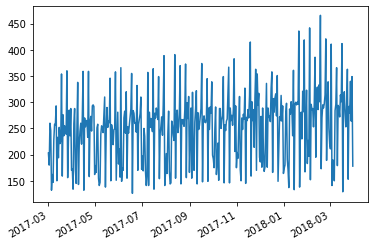

In [109]:
# check for pattern in number of rows per date
df["date"].value_counts().plot()

In [8]:
# split data into various groups
D_df = df[[col for col in df.columns if col.startswith("D")]]
S_df = df[[col for col in df.columns if col.startswith("S")]]
P_df = df[[col for col in df.columns if col.startswith("P")]]
B_df = df[[col for col in df.columns if col.startswith("B")]]
R_df = df[[col for col in df.columns if col.startswith("R")]]

In [17]:
print(f"Number of 'D' columns: {len(D_df.columns)}")
print(f"Number of 'S' columns: {len(S_df.columns)}")
print(f"Number of 'P' columns: {len(P_df.columns)}")
print(f"Number of 'B' columns: {len(B_df.columns)}")
print(f"Number of 'R' columns: {len(R_df.columns)}")

Number of 'D' columns: 96
Number of 'S' columns: 22
Number of 'P' columns: 3
Number of 'B' columns: 40
Number of 'R' columns: 28


In [12]:
# validation
len(D_df.columns) + len(S_df.columns) + len(P_df.columns) + \
                    len(B_df.columns) + len(R_df.columns)

189

### Target

In [34]:
# preview labels
target.head()

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0


In [37]:
# check shape of labels
target.shape

(100000, 2)

In [42]:
target["customer_ID"].nunique()

8294

In [53]:
# composition of total target values (not as useful)
target["target"].value_counts(normalize=True)

0    0.74613
1    0.25387
Name: target, dtype: float64

From the code block located directly below, we can be certain that in the main dataset, each customer is only represented by a single target value across all dates with that customer. We can be certain of this because if we group by customer_ID and query the mean for each customer's group of target values, every group's mean takes on a value of either 0 or 1; as the target is valued at either 0 or 1 for each of its 100000 entries, under the definition of mean, each group must consist of all 0s or all 1s. 

More practically, take for example, we group the data by customer. We find that there are approximately 8000 customers across approximately 40 dates. Not all customers are represented for all dates, but each customer is represented by some dates. Under these premises, we observe that each customer chiefly expresses itself as either 0 or 1 for every date that the customer shows up in the table.

In [52]:
target.groupby("customer_ID")["target"].mean().value_counts(normalize=True)

0.0    0.734989
1.0    0.265011
Name: target, dtype: float64

In [36]:
# check that indices match
all(df["customer_ID"] == target["customer_ID"])

True

In [40]:
# check composition of dataset
target["target"].value_counts()

0    74613
1    25387
Name: target, dtype: int64

In [55]:
def split(a, n):
    k, m = divmod(len(a), n)
    return (a[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n))

In [60]:
int(len(df.columns) / 10)

19

In [65]:
list(split(list(df.columns), int(len(df.columns) / 10)))

[['customer_ID',
  'S_2',
  'P_2',
  'D_39',
  'B_1',
  'B_2',
  'R_1',
  'S_3',
  'D_41',
  'B_3'],
 ['D_42', 'D_43', 'D_44', 'B_4', 'D_45', 'B_5', 'R_2', 'D_46', 'D_47', 'D_48'],
 ['D_49', 'B_6', 'B_7', 'B_8', 'D_50', 'D_51', 'B_9', 'R_3', 'D_52', 'P_3'],
 ['B_10', 'D_53', 'S_5', 'B_11', 'S_6', 'D_54', 'R_4', 'S_7', 'B_12', 'S_8'],
 ['D_55',
  'D_56',
  'B_13',
  'R_5',
  'D_58',
  'S_9',
  'B_14',
  'D_59',
  'D_60',
  'D_61'],
 ['B_15',
  'S_11',
  'D_62',
  'D_63',
  'D_64',
  'D_65',
  'B_16',
  'B_17',
  'B_18',
  'B_19'],
 ['D_66',
  'B_20',
  'D_68',
  'S_12',
  'R_6',
  'S_13',
  'B_21',
  'D_69',
  'B_22',
  'D_70'],
 ['D_71',
  'D_72',
  'S_15',
  'B_23',
  'D_73',
  'P_4',
  'D_74',
  'D_75',
  'D_76',
  'B_24'],
 ['R_7', 'D_77', 'B_25', 'B_26', 'D_78', 'D_79', 'R_8', 'R_9', 'S_16', 'D_80'],
 ['R_10',
  'R_11',
  'B_27',
  'D_81',
  'D_82',
  'S_17',
  'R_12',
  'B_28',
  'R_13',
  'D_83'],
 ['R_14',
  'R_15',
  'D_84',
  'R_16',
  'B_29',
  'B_30',
  'S_18',
  'D_86',
  '

## Modeling

### Data Preparation

### Baseline

### Logistic Regression

## Evaluation

## Conclusion

### Recommendations